In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import matplotlib 
matplotlib.rc('xtick', labelsize=15) 
matplotlib.rc('ytick', labelsize=15) 
%matplotlib inline

In [3]:
meta = pd.read_csv("data//potatometadata_forClaudia.csv")
meta.head()

,FieldID,Experiment,field name,diffCSscore,Mean.Control.Microbe,Mean.LowN.Microbe,varCtub,varNtub,varCSscore,invVar_Ctub,...,cladediv0.55,claderich0.6,cladediv0.6,claderich0.7,cladediv0.7,claderich0.8,cladediv0.8,asvrich,asvdiv,PD
0,1,2015,CF1,1.280556,247.26153,218.67840,75.443121,551.385549,1.148148,0.013255,...,4.835654,339,4.887446,370,5.087528,395,5.226187,400,5.230529,31.699375
1,2,2015,CF2,0.762103,221.60938,216.76044,2061.830163,329.386189,0.833558,0.000485,...,4.842094,321,4.898134,337,5.144046,354,5.209358,355,5.211097,26.603089
2,3,2015,CF4,1.089286,260.05795,209.17201,382.961433,853.913357,0.317602,0.002611,...,4.153512,286,4.232498,310,4.453618,340,4.567909,340,4.567909,30.883599
3,4,2015,CF5,3.208333,238.36716,233.20952,452.336408,214.991855,9.159722,0.002211,...,4.511198,249,4.570936,264,4.752686,274,4.784318,274,4.784318,23.384369
4,5,2015,DO1,2.450000,286.36653,252.37100,941.434313,249.128362,4.196667,0.001062,...,4.403219,142,4.414700,154,4.602408,159,4.638410,159,4.638410,19.468832


In [4]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 44 columns):
FieldID                         26 non-null int64
Experiment                      26 non-null int64
field name                      26 non-null object
diffCSscore                     26 non-null float64
Mean.Control.Microbe            26 non-null float64
Mean.LowN.Microbe               26 non-null float64
varCtub                         26 non-null float64
varNtub                         26 non-null float64
varCSscore                      26 non-null float64
invVar_Ctub                     26 non-null float64
invVar_Ntub                     26 non-null float64
invVar_Csscore                  23 non-null float64
Std.Err.Mean.Control.Microbe    26 non-null float64
Std.Err.Mean.LowN.Microbe       26 non-null float64
seCSscore                       26 non-null float64
claderich0.1                    26 non-null int64
cladediv0.1                     26 non-null float64
claderich0.15       

In [5]:
meta_explore = meta[meta["Experiment"] == 2015]
meta_confirm = meta[meta["Experiment"] == 2017]

In [6]:
meta_explore["Nmeandiff"] = meta_explore["Mean.Control.Microbe"] - meta_explore["Mean.LowN.Microbe"]
meta_explore["Nmeandiff"].describe()

C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    13.000000
mean     26.593609
std      19.085474
min      -1.451870
25%      16.398830
50%      24.350290
75%      33.995530
max      59.625440
Name: Nmeandiff, dtype: float64

In [7]:
meta_confirm["Nmeandiff"] = meta_confirm["Mean.Control.Microbe"] - meta_confirm["Mean.LowN.Microbe"]
meta_confirm["Nmeandiff"].describe()

C:\Users\CSY\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


count    13.000000
mean     45.510846
std      27.350912
min     -19.670000
25%      32.430000
50%      48.460000
75%      55.910000
max      85.320000
Name: Nmeandiff, dtype: float64

In [12]:
def plot_yield_diff(ax, df, title):
    barWidth = 0.25
    # set height of bar
    bars1 = df["Mean.Control.Microbe"]
    bars2 = df["Mean.LowN.Microbe"]
    bars3 = df["Nmeandiff"]

    # Set position of bar on X axis
    r1 = np.arange(len(bars1))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]

    # Make the plot
    ax.bar(r1, bars1, color='#2d7f5e', width=barWidth, edgecolor='white', label='high nut')
    ax.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='low nut')
    ax.bar(r3, bars3, color='#7f6d5f', width=barWidth, edgecolor='white', label='diff')

    # Add xticks on the middle of the group bars
    ax.set_xlabel('FieldId', fontweight='bold', fontsize=20)
    ax.set_ylabel('Tuber Yield', fontsize=20)
    ax.set_xticks([r + barWidth for r in range(len(bars1))], minor=False)
    ax.set_xticklabels(df.FieldID)
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), ncol=3, shadow=False, fontsize=14)
    ax.set_title(title, size=22)

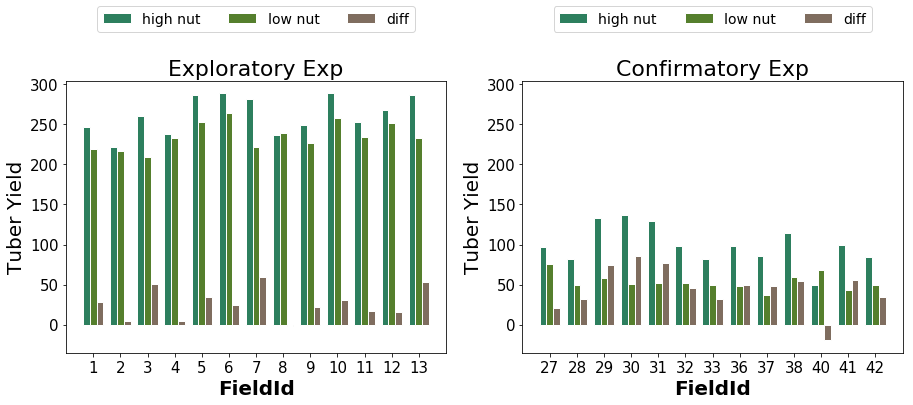

In [14]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,2,1)
plot_yield_diff(ax1, meta_explore, "Exploratory Exp")
ax2 = fig.add_subplot(1,2,2,sharey=ax1)
plot_yield_diff(ax2, meta_confirm, "Confirmatory Exp")

In [36]:
def scatter_disease(ax, df, title):
    ax.scatter(df.FieldID, df.diffCSscore)
    ax.set_xlabel('FieldId', fontsize=15)
    ax.set_xticks(df.FieldID)
    ax.set_ylabel('Disease Severity', fontsize=15)
    ax.set_title(title, size=20)

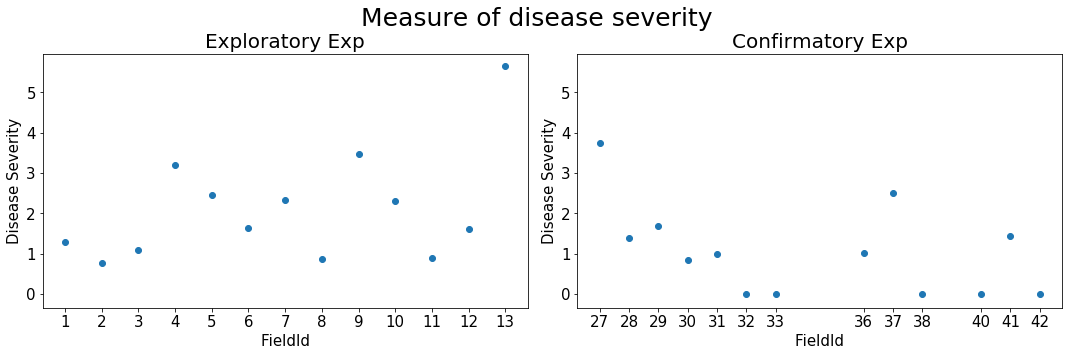

In [44]:
fig2 = plt.figure(figsize=(15, 5))
fig2.suptitle("Measure of disease severity", fontsize=25)
ax21 = fig2.add_subplot(1,2,1)
scatter_disease(ax21, meta_explore, "Exploratory Exp")
ax22 = fig2.add_subplot(1,2,2,sharey=ax21)
scatter_disease(ax22, meta_confirm, "Confirmatory Exp")
fig2.tight_layout()
fig2.subplots_adjust(top=0.85)
plt.show()